# Lab_01-1 Numpy, Pandas 실습

### Context
#### Numpy
+ Scalar, Vector
+ Matrix 
+ Functions

#### Pandas
+ Series
+ DataFrame
+ Functions

In [1]:
import time
import os
from os.path import join #linux는 구분자가 역슬래시이고, window는 원화인데 이런것을 통합시켜 주는 것이 join!!이다 

import numpy as np
import pandas as pd

# Numpy
## Numpy란?
넘파이(Numpy)는 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리 할 수 있도록 지원하는 파이썬의 라이브러리입니다. <br>
데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공합니다.

### 1. Scalar, Vector
#### Scalar
Scalar는 방향은 없지만, 실수 공간에서 크기를 나타내는 값을 말합니다. <br>
간단하게 상수를 생각하시면 됩니다. 

$ a\ \in \mathbf{R}$

In [2]:
a = np.array(0)#이거 스칼라이다, 지금 차원이 없는 상태임
a
print(a.shape)

()


#### Vector
Vector는 n차원 공간에서 방향과 크기를 갖는 단위를 말합니다. <br>
n차원 공간에서의 벡터 x는 다음과 같이 표기하며, n개의 원소를 가지고 있습니다.<br>
정형 데이터에서 어떤 샘플의 데이터를 '특성 벡터'라고도 말합니다.

$ \vec{x}\ = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ ... \\ x_n \end{bmatrix} $

Numpy의 `np.array()` 배열 객체(ndarray)를 사용해 벡터를 생성할 수 있습니다. 

In [3]:
x1 = np.array([1, 2, 3])
x1

array([1, 2, 3])

In [4]:
x1.shape #shape는 그 자료형이 몇 차원인지 알려준다 밑에처럼,
#1차원의 데이터이며, 총 3이라는 크기를 갖고 있음

(3,)

In [5]:
x2 = np.array([[1], [2], [3]])#얘는 행렬 표현!!!!!!
x2
#2차원의 데이터이며, 3 * 1크기를 갖고 있는 array

array([[1],
       [2],
       [3]])

In [6]:
x2.shape

(3, 1)

Numpy는 1차원 배열 객체도 벡터로 인정하지만, <br> x2처럼 열 벡터(Column Vector)로 나타낸 2차원 배열 객체로 표현한 방식이 올바른 표기입니다.

### 2. Matrix
Matrix는 행과 열로 이루어진 구조를 이야기하는데, 선형대수학에서는 열 벡터를 모아놓은 것으로도 이야기합니다. <br>
mxn 행렬은 다음과 같이 표기하며 m*n개의 원소를 가지고 있습니다. 

$ \matrix{A}\ = \begin{bmatrix} {x_{11} \\ x_{21}\\ .. \\ x_{m1}} & { x_{12} \\ .. \\ .. \\ .. } & {.. \\ .. \\ .. \\ .. }& {x_{1n} \\ .. \\ .. \\ x_{mn}} \end{bmatrix} $

벡터와 동일하게 Numpy의 `np.array()` 배열 객체를 사용해 행렬을 생성할 수 있습니다.

In [7]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A
print(A.shape)

(2, 3)


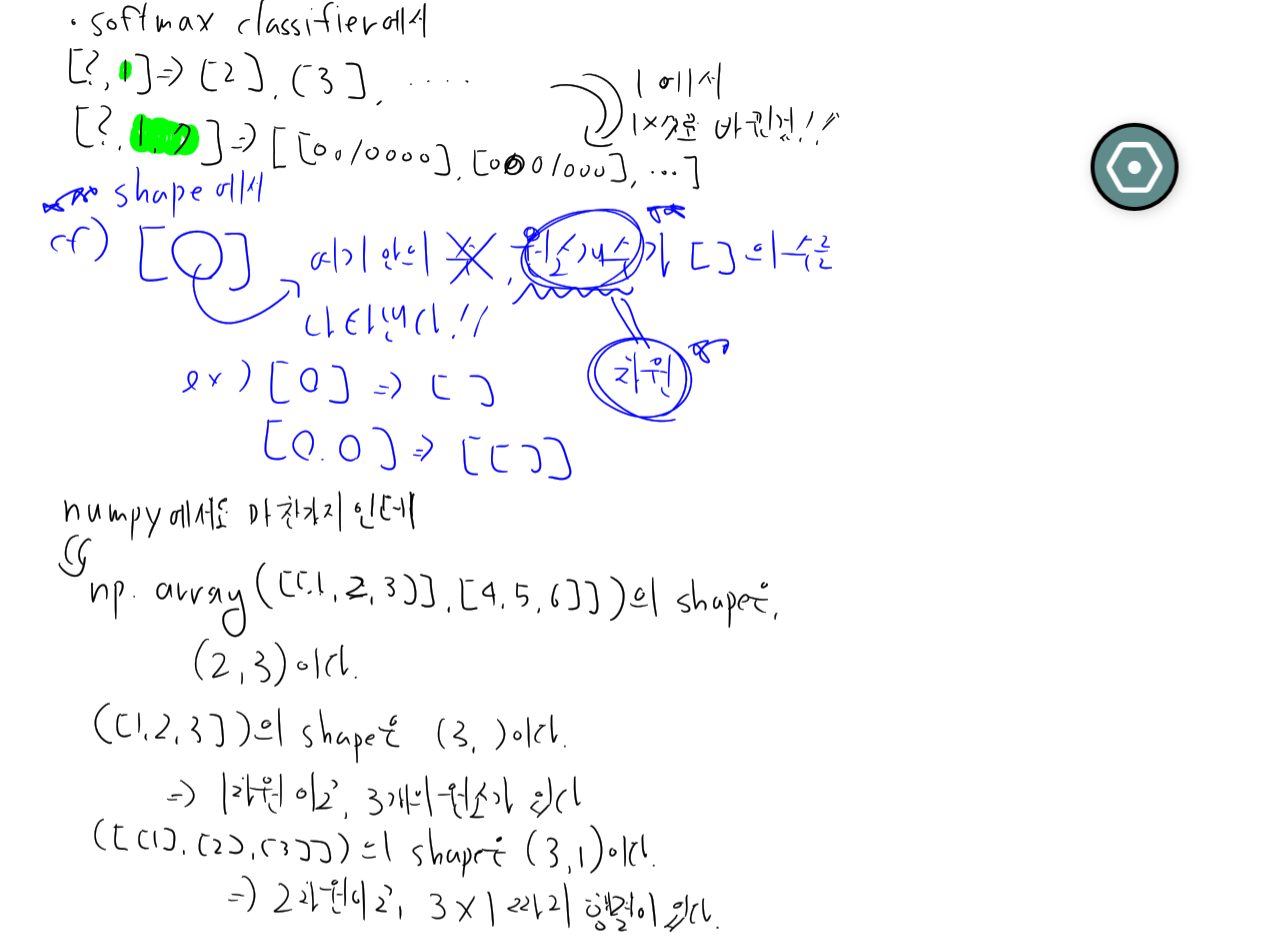

### 3. Functions
자주 사용되는 Numpy의 기능에 대해 알아보겠습니다. 

#### 1) np.shape, np.reshape
##### np.shape
행렬의 차원을 확인할 수 있는 메소드이며, `np.shape(행렬)` 뿐만아니라 `행렬.shape` 방식으로도 사용 가능합니다.<br><br>

##### np.reshape
행렬의 차원을 변경하는 메소드로 변경 이전 차원의 곱과 변경 이후 차원의 곱이 같다면, 변환이 가능합니다.<br>

예를 들어 (2, 8) 차원을 가진 행렬 A는 (4, 4) 차원을 가진 행렬로 변환이 가능합니다. 2x8 = 16, 4x4 = 16이기 때문입니다. <br>
하지만 (3, 5) 차원을 가진 행렬로는 변환이 불기능합니다. 3x5 = 15이기 때문에 차원이 일치하지 않습니다. 

`np.reshape(행렬, 변환할 차원)`으로 차원을 변경할 수도 있고, `행렬.reshape(변환할 차원)`으로 변경할 수도 있습니다.

In [8]:
A = np.array([[1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1]])
A

array([[1, 2, 3, 4, 5, 6, 7, 8],
       [8, 7, 6, 5, 4, 3, 2, 1]])

In [9]:
A.shape

(2, 8)

In [10]:
A.reshape((2,8,1,1,1))

array([[[[[1]]],


        [[[2]]],


        [[[3]]],


        [[[4]]],


        [[[5]]],


        [[[6]]],


        [[[7]]],


        [[[8]]]],



       [[[[8]]],


        [[[7]]],


        [[[6]]],


        [[[5]]],


        [[[4]]],


        [[[3]]],


        [[[2]]],


        [[[1]]]]])

In [11]:
np.reshape(A, (4, 4))

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [8, 7, 6, 5],
       [4, 3, 2, 1]])

In [12]:
try:
    np.reshape(A, (3, 5))
    print('(3, 5) 행렬로 차원을 변환하였습니다.')
except:
    print('(2, 8) 차원의 행렬을 (3, 5) 차원의 행렬로 변환할 수 없습니다.')
#try 블록 수행 중 오류가 발생하면 except 블록이 수행된다. 하지만 try 블록에서 오류가 발생하지 않는다면 except 블록은 수행되지 않는다.

(2, 8) 차원의 행렬을 (3, 5) 차원의 행렬로 변환할 수 없습니다.


# reshape를 사용해 (n,) 차원으로 구성된 벡터를 (n, 1) 차원으로 구성된 행렬로 변경할 수 있습니다 

In [13]:
A = np.array([i for i in range(8)])
A.shape

(8,)

In [14]:
# 여기에서 -1은 n개의 차원 중 n-1개는 사용자가 지정하고 나머지는 알아서 가능한 차원에 맞추라는 의미입니다. 
# 해당 예제의 경우 2개의 차원 중 마지막 차원에 1을 할당했으므로 -1에는 8이 들어가 (8, 1) 차원 행렬이 됩니다. 
A.reshape(-1, 1).shape

(8, 1)

#### 2) np.concatenate()
여러 개의 Numpy 행렬을 특정 방향으로 이어붙이고 싶은 경우에는 np.concatenate() 함수를 사용할 수 있습니다.<br>
ndarray.shape로 차원을 확인하고, 차원을 지정해서 행렬을 이어붙일 수 있습니다. 

In [15]:
sample_arr = np.reshape(A, (4, 2))
sample_arr

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [16]:
sample_arr.shape

(4, 2)

In [17]:
# 행 방향으로 붙이기
np.concatenate([sample_arr, sample_arr, sample_arr], axis=0).shape#axis가 축이라는 것이다. 행에 붙이려면 0, 열에 붙이려면 1

(12, 2)

In [18]:
print(np.concatenate([sample_arr, sample_arr, sample_arr], axis=0))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [0 1]
 [2 3]
 [4 5]
 [6 7]
 [0 1]
 [2 3]
 [4 5]
 [6 7]]


In [19]:
# 열 방향으로 붙이기
np.concatenate([sample_arr, sample_arr, sample_arr], axis=1).shape

(4, 6)

In [20]:
print(np.concatenate([sample_arr, sample_arr, sample_arr], axis=1))

[[0 1 0 1 0 1]
 [2 3 2 3 2 3]
 [4 5 4 5 4 5]
 [6 7 6 7 6 7]]


#### 3) np.sum, np.mean, np.var, np.std, np.max, np.min, np.unique
더하기, 평균, 분산, 표준 편차 등 기초 통계량을 계산하는 메소드 입니다. 동일한 기능을 하는 파이썬 내장 함수가 있지만, <br>
Numpy의 메소드 들은 axis 인자를 할당함으로써 특정 축을 기준으로 연산할 수 있다는 특징이 있습니다.<br>
ex) `np.sum(x, axis=0)` `np.mean(x, axis=1)` `np.var(x, axis=2)` `np.std(x, axis=3)` `np.max(x, axis=1)` `np.min(x, axis=2)` `np.unique(x, axis=0)`

In [21]:
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [22]:
A.shape

(3, 4)

##### (1) np.sum()
`np.sum(행렬, 축)` 은 주어진 행렬과 축 방향에 대해 합계를 계산해 반환하는 함수입니다.

In [23]:
# 0번째 차원 방향으로 모든 원소들의 합
np.sum(A, axis=0)
#[1+5+9, 2+6+10, 3+7+11, 4+8+12]

array([15, 18, 21, 24])

In [24]:
# 1번째 차원 방향으로 모든 원소들의 합
np.sum(A, axis=1)
#[1+2+3+4, 5+6+7+8, 9+10+11+12]

array([10, 26, 42])

##### (2) np.mean()
`np.mean(행렬, 축)` 은 주어진 행렬과 축 방향에 대해 평균을 계산해 반환하는 함수입니다.

In [25]:
# 0번째 차원 방향으로 모든 원소들의 평균
np.mean(A, axis=0)

array([5., 6., 7., 8.])

In [26]:
# 1번째 차원 방향으로 모든 원소들의 평균
np.mean(A, axis=1)

array([ 2.5,  6.5, 10.5])

##### (3) np.var()
`np.var(행렬, 축)` 은 주어진 행렬과 축 방향에 대해 분산을 계산해 반환하는 함수입니다.

In [27]:
# 0번째 차원 방향으로 모든 원소들의 분산
np.var(A, axis=0)

array([10.66666667, 10.66666667, 10.66666667, 10.66666667])

In [28]:
# 1번째 차원 방향으로 모든 원소들의 분산
np.var(A, axis=1)

array([1.25, 1.25, 1.25])

##### (4) np.std()
`np.std(행렬, 축)` 은 주어진 행렬과 축 방향에 대해 표준편차를 계산해 반환하는 함수입니다.

In [29]:
# 0번째 차원 방향으로 모든 원소들의 표준편차
np.std(A, axis=0)

array([3.26598632, 3.26598632, 3.26598632, 3.26598632])

In [30]:
# 0번째 차원 방향으로 모든 원소들의 표준편차
np.std(A, axis=1)

array([1.11803399, 1.11803399, 1.11803399])

##### (5) np.max()
`np.max(행렬, 축)` 은 주어진 행렬과 축 방향에 대해 최대값을 반환하는 함수입니다.

In [31]:
# 0번째 차원 방향으로 원소들의 최대값
np.max(A, axis=0)

array([ 9, 10, 11, 12])

In [32]:
# 1번째 차원 방향으로 원소들의 최대값
np.max(A, axis=1)

array([ 4,  8, 12])

##### (6) np.min()
`np.min(행렬, 축)` 은 주어진 행렬과 축 방향에 대해 최소값을 반환하는 함수입니다.

In [33]:
# 0번째 차원 방향으로 원소들의 최소값
np.min(A, axis=0)

array([1, 2, 3, 4])

In [34]:
# 1번째 차원 방향으로 원소들의 최소값
np.min(A, axis=1)

array([1, 5, 9])

##### (7) np.unique()
`np.unique(행렬)` 은 주어진 행렬에 대해 중복을 제거하여 모든 원소 값을 반환하는 함수입니다.

In [35]:
A = np.array([[0, 0, 0, 0], [1, 2, 2, 0], [3, 4, 5, 4]])
A

array([[0, 0, 0, 0],
       [1, 2, 2, 0],
       [3, 4, 5, 4]])

In [36]:
# 원소들 중 고유한 값
np.unique(A)

array([0, 1, 2, 3, 4, 5])

#### 4) np.log, np.exp
값에 자연 로그를 취하거나 자연 상수의 지수곱을 수행하는 함수입니다.<br>

일반적으로 데이터가 치우친(Skew) 분포를 가지고 있을 경우 로그 변환을 수행하게 되는데, np.log는 이 때 사용하는 메소드 입니다. <br>
자연 로그의 역함수로 사용되는 메소드로 np.exp가 있습니다. 

In [37]:
a = 2.714
b = np.log(a)
b

0.9984235614126774

In [38]:
np.exp(b)

2.714

# Pandas
## Pandas란?
판다스(Pandas)는 데이터 조작 및 분석을 위해 사용하는 라이브러리입니다. <br>
특히, 숫자 테이블 및 시계열 데이터를 위한 데이터 구조 및 함수를 제공합니다.

### 1. Series
시리즈(Series)는 Pandas의 대표적인 데이터 객체 표현으로 라벨(컬럼 이름)을 가진 1차원 배열입니다. <br>
간단하게 하나의 열(Column)을 생각하시면 됩니다. 

$ Series\ = {\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ ... \\ x_n \end{bmatrix}}_{변수 이름} $

In [39]:
S = pd.Series(np.array([1, 2, 3, 4, 5, 6, 7, 8]), name='변수 이름')#cf)numpy랑 pandas는 서로 변환이 된다!
S

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
Name: 변수 이름, dtype: int32

In [40]:
S.values #cf)이것도 numpy와 pandas는 서로 변환이 된다는 것의 예시

array([1, 2, 3, 4, 5, 6, 7, 8])

In [41]:
#그리고, 걍 python 배열로 넣어도 사용가능!!
S = pd.Series([1,2,3,4,5,6,7])
S

0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64

In [42]:
S.values

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

### 2. DataFrame
데이터 프레임(DataFrame)는 Pandas의 대표적인 데이터 객체 표현으로 라벨(컬럼 이름)을 가진 2차원 배열입니다. <br>
간단하게 엑셀 데이터를 생각하시면 됩니다. 

$ DataFrame\ = {\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ ... \\ x_n \end{bmatrix}}_{변수 이름1}  {\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ ... \\ x_n \end{bmatrix}}_{변수 이름2}  {\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ ... \\ x_n \end{bmatrix}}_{변수 이름3}$

In [43]:
DF = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['Var1', 'Var2', 'Var3'])
DF

,Var1,Var2,Var3
0,1,2,3
1,4,5,6
2,7,8,9


### 3. Functions
자주 사용되는 Pandas의 기능에 대해 알아보겠습니다. 

#### 1) DataFrame.shape
Numpy의 np.shape 처럼 동일하게 차원을 확인할 수 있는 속성입니다. <br>
차원을 변경할 수 있는 reshape 함수는 따로 존재하지 않기 때문에 <br>
차원을 변경하고자 할 때는 Numpy 행렬로 변경한 후에 np.reshape 메소드를 사용하여 변경합니다.

##### DataFrame.shape
Pandas의 DataFrame의 행과 열의 수를 확인할 수 있는 메소드입니다.

In [44]:
# 3개의 행과 3개의 열로 구성된 것을 확인할 수 있습니다. 
DF.shape

(3, 3)

#### 2) .head()
`.head(개수)` 는 Series나 DataFrame 객체가 가진 값의 일부분을 반환하는 메소드 입니다. <br>
기본 값으로 5개를 반환하며, 전달한 인자의 숫자에 따라 개수를 조절할 수 있습니다.

In [45]:
DF.head()#이 함수의 용도는 그냥, 값이 잘 불러졌나 확인용(자료형이 크면, 앞에만 확인하게)
#여기서 DF는 3개만 있으니깐 3개만 나온거 

,Var1,Var2,Var3
0,1,2,3
1,4,5,6
2,7,8,9


In [46]:
DF.head(1)

,Var1,Var2,Var3
0,1,2,3


#### 2) .info()
`.info()` 는 Series나 DataFrame 객체가 가진 변수들의 정보를 보여줍니다. <br>
일반적으로 변수들의 자료형(수치형 or 범주형)을 확인하기 위해 사용하기도 합니다.

In [47]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Var1    3 non-null      int32
 1   Var2    3 non-null      int32
 2   Var3    3 non-null      int32
dtypes: int32(3)
memory usage: 164.0 bytes


#### 3) .describe()
`.describe()` 는 Series나 DataFrame 객체가 가진 변수들의 최대, 최소, 중간, 평균, 표준편차 등 기초 통계량 값을 확인할 수 있습니다.<br>

In [48]:
DF.describe()

,Var1,Var2,Var3
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


cf) head, info, describe는 그냥 변수들을 대략적으로 확인하는 용도

#### 4) .values
`.values` 속성은 Series나 DataFrame에서 값을 Numpy 배열(ndarray)로 반환해줍니다. <br>
주로 대용량 데이터 처리 시 Pandas 자체 연산보다는 Numpy 배열 연산이 빠르기 때문에 Numpy 배열로 변환 후 연산할 때 사용합니다.

In [49]:
DF.values

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

#### 5) pd.read_csv()
`pd.read_csv(파일명)` 메소드는 csv(comma-separated variables) 파일로 이루어진 데이터를 DataFrame으로 읽어오는 기능을 수행합니다. <br>
주로 정형 데이터를 읽어올 때 사용됩니다. <br><br>

샘플 데이터 경로: `data/sample_adult_data.csv`

cf)csv파일은 엑셀 파일 같은 것인데, 변수들과 데이터들이 , 와 같은것으 구분되어 나열돼 있는 파일이다

In [50]:
from os.path import join

In [51]:
filename = join('data', 'sample_adult_data.csv')
DF = pd.read_csv(filename)

In [52]:
DF.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [53]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [54]:
DF.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [55]:
DF.values

array([[39, ' State-gov', 77516, ..., 40, ' United-States', '<=50K'],
       [50, ' Self-emp-not-inc', 83311, ..., 13, ' United-States',
        '<=50K'],
       [38, ' Private', 215646, ..., 40, ' United-States', '<=50K'],
       ...,
       [38, ' Private', 374983, ..., 50, ' United-States', '<=50K'],
       [44, ' Private', 83891, ..., 40, ' United-States', '<=50K'],
       [35, ' Self-emp-inc', 182148, ..., 60, ' United-States', '>50K']],
      dtype=object)

#### 6) Series,DataFrame.append(), Pandas.concat()

##### Series,DataFrame.append()
Series나 DataFrame에 행 방향으로 Series나 DataFrame을 추가하고 싶은 경우에는 append() 메소드를 사용할 수 있습니다. 

In [56]:
# Series에 하나의 값을 추가할 때
S

0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64

In [57]:
S2 = pd.Series([5, 4, 3, 2, 1])

In [58]:
S.append(S2)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
0    5
1    4
2    3
3    2
4    1
dtype: int64

In [59]:
# DataFrame에 행 방향으로 추가할 때
tmp_DF = DF.iloc[0:1, :]#iloc은 뒤에 나옴
tmp_DF

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [60]:
tmp_DF.append(tmp_DF)#자기한테 자기 자신을 뒤에다 붙인 것

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


##### cf)append는 행만 추가가 가능하고, 열을 추가가 불가능할 것에 비해 concat는 열까지 추가가 가능하다!

##### Pandas.concat()
append()는 행 방향으로만 추가가 가능합니다. 축을 지정해서 추가하고 싶은 경우에는 Pandas.concat() 함수를 사용하면 됩니다. 

In [61]:
DF.shape

(48842, 15)

In [62]:
# 행 방향으로 붙이기 append()와 동일
pd.concat([DF, DF], axis=0).shape#->shape이 행방향으로 붙인것이므로, 행의 개수가 97684개

(97684, 15)

In [63]:
# 열 방향으로 붙이기
pd.concat([DF, DF], axis=1).shape#->shape이 열방향으로 붙인것이므로, 열의 개수가 30개

(48842, 30)

#### cf)concat을 열방향으로 할때는, 붙이는 것을 index 기준으로 하기 때문에, index가 초기화 돼 있는 것인지, 꼬여 있는 것은 아닌지 확인해주고 concat해줘야 한다. 따라서 index초기화는 항상 해줘야 한다!!!!!!!!!(걍 index초기화 항상 해준다는 것만 기억해둬도 무방)

#### 7) DataFrame.loc DataFrame.iloc
DataFrame을 제대로 사용하기 위해서는 필수로 익혀야하는 메소드 2가지 입니다. <br>
간단하게 생각하면, 특정 조건에 맞는 행과 열을 추출한다고 말할 수 있습니다.<br>
iloc 메소드 보다는 loc 메소드가 더 자주 사용됩니다.

##### DataFrame.loc[]
`DataFrame.loc[행 조건, 열 조건]`으로 해당 조건에 맞는 행과 열을 찾아냅니다. <br>
예를 들어 age 컬럼의 값이 39인 행과 'age, workclass, fnlwgt, education, marital-status' 열로 구성된 데이터만을 추출하고 싶은 경우 <br>
DF.loc[DF['age'] == 39, ['age', 'workclass', 'fnlwgt', 'education', 'marital-status']] 와 같이 작성할 수 있습니다.

In [64]:
DF.loc[DF['age'] == 39, ['age', 'workclass', 'fnlwgt', 'education', 'marital-status']]
#cf)Df.loc[DF['age'] == 39, : ]라고 치면, age가 39살인 사람들을 끌어오고, 모든 column들을 나타내준다

,age,workclass,fnlwgt,education,marital-status
0,39,State-gov,77516,Bachelors,Never-married
28,39,Private,367260,HS-grad,Divorced
129,39,Private,365739,Some-college,Divorced
166,39,Federal-gov,235485,Assoc-acdm,Never-married
297,39,?,157443,Masters,Married-civ-spouse
...,...,...,...,...,...
48703,39,Federal-gov,263690,Masters,Married-civ-spouse
48732,39,Private,357118,Bachelors,Never-married
48751,39,Private,139057,Prof-school,Married-civ-spouse
48814,39,Private,229647,Bachelors,Never-married


##### DataFrame.iloc[]
`DataFrame.iloc[행 인덱스, 열 인덱스]`으로 인덱스에 맞는 행과 열을 찾아냅니다. <br>
예를 들어 짝수 인덱스를 갖는 행과 홀수 열로 구성된 데이터만을 추출하고 싶은 경우 <br>
DF.iloc[[int(2\*i) for i in range(int(DF.shape[0]/2))], [int(2\*i) for i in range(int(DF.shape[1]/2))]] 와 같이 작성할 수 있습니다.

In [65]:
DF.iloc[[int(2*i) for i in range(int(DF.shape[0]/2))], [int(2*i)+1 for i in range(int(DF.shape[1]/2))]]
# !!밑에 block 참고!!!!
#iloc은 numpy배열에서 쓰던 것을 그대로 dataframe에서 쓰겠다고 하면, iloc을 쓴다.
#bc/numpy는 index가 숫자로만 이루어져 있기 때문에

,workclass,education,marital-status,relationship,sex,capital-loss,native-country
0,State-gov,Bachelors,Never-married,Not-in-family,Male,0,United-States
2,Private,HS-grad,Divorced,Not-in-family,Male,0,United-States
4,Private,Bachelors,Married-civ-spouse,Wife,Female,0,Cuba
6,Private,9th,Married-spouse-absent,Not-in-family,Female,0,Jamaica
8,Private,Masters,Never-married,Not-in-family,Female,0,United-States
...,...,...,...,...,...,...,...
48832,Private,HS-grad,Married-civ-spouse,Husband,Male,0,United-States
48834,Private,HS-grad,Never-married,Own-child,Female,0,United-States
48836,Private,Bachelors,Never-married,Own-child,Male,0,United-States
48838,?,HS-grad,Widowed,Other-relative,Male,0,United-States


#### 파이썬에는 list를 만드는 신기한 문법이 있다. 밑에 2개의 블럭이 있는데, 위에 있는 블럭과 밑에 있는 블럭이 같은 의미이다

#### ->이걸 list comprehension 이라고 한다 https://mingrammer.com/introduce-comprehension-of-python/ 참고

In [66]:
tmp_list = list()
for i in range(int(DF.shape[0]/2)):
    tmp_list.append(i)
tmp_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [67]:
[int(2*i) for i in range(int(DF.shape[0]/2))]

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 118,
 120,
 122,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 154,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 172,
 174,
 176,
 178,
 180,
 182,
 184,
 186,
 188,
 190,
 192,
 194,
 196,
 198,
 200,
 202,
 204,
 206,
 208,
 210,
 212,
 214,
 216,
 218,
 220,
 222,
 224,
 226,
 228,
 230,
 232,
 234,
 236,
 238,
 240,
 242,
 244,
 246,
 248,
 250,
 252,
 254,
 256,
 258,
 260,
 262,
 264,
 266,
 268,
 270,
 272,
 274,
 276,
 278,
 280,
 282,
 284,
 286,
 288,
 290,
 292,
 294,
 296,
 298,
 300,
 302,
 304,
 306,
 308,
 310,
 312,
 314,
 316,
 318,
 320,
 322,
 324,
 326,
 328,
 330,
 332,
 334,
 336,
 338,
 340,
 342,
 344,
 346,
 348,
 350,

#### 8) map, apply, applymap

##### Series.map()
map 함수는 Pandas Series(column)에 사용할 수 있는 함수로 Series의 `각 원소에 연산을 적용` 할 수 있습니다. 각 원소를 입력으로 받아 단일 값을 반환합니다.<br>
예를들어 인종 컬럼인 'race' 컬럼에 라벨 인코딩을 적용하고 싶은 경우 다음과 같이 할 수 있습니다. 

In [68]:
DF.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [69]:
# race 컬럼에 존재하는 값들로 리스트 생성
race_lst = DF['race'].unique().tolist()
race_lst

[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other']

In [70]:
def race_to_label(x):
    return race_lst.index(x)

In [71]:
# race 값 리스트의 인덱스 값으로 new_race 컬럼 생성
DF['new_race'] = DF['race'].map(lambda x: race_to_label(x))
#절케 lambda를 써주는 이유는, lambda를 써서 race라는 series의 각원소(여기서는 x가 될거임)가 튀어나옴
#여기서는 x가 각각 인종인데, 그 값들을 race_to_label로 계산해서 new_race라는 값으로 나온다
#lambda를 쓰면 각각의 원소(x)에다 조건을 걸기 쉬움

In [72]:
DF.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


#### Data Frame에 적용되는 것은 "apply", Series 에 적용되는 것은 "map"

##### DataFrame.apply()
apply, applymap 함수는 Pandas DataFrame에 사용할 수 있는 함수로 apply는 `행 또는 열 같은 축에 대해 연산을 적용` 할 수 있습니다. 행 또는 열을 입력으로 받아 단일 값을 반환합니다. <br>
예를들어 행에 존재하는 모든 수치형 열의 값을 더해서 새로운 열을 만들고자 한다면 다음과 같이 할 수 있습니다.

In [73]:
# 수치형 컬럼 'age', 'fnlwgt', 'education-num', 'capital-gain', 'hours-per-week' 
DF['sum_num_var'] = DF.apply(lambda x: x['age'] + x['fnlwgt'] + x['education-num'] + x['capital-gain'] + x['hours-per-week'], axis=1)

In [74]:
DF.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race,sum_num_var
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,79782
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,83387
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,215733
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,234821
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,338490


##### DataFrame.applymap()
Pandas DataFrame에 사용할 수 있는 함수로 applymap은 Series의 map과 동일하게 `각 원소에 연산을 적용`할 수 있습니다. 각 원소를 입력으로 받아 단일 값을 반환합니다.<br>
예를들어 모든 수치형 값에 log를 취한다면 다음과 같이 할 수 있습니다. 

In [75]:
DF[['age', 'fnlwgt', 'education-num', 'capital-gain', 'hours-per-week']].applymap(lambda x: np.log(x))

C:\Users\EK Hong\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,age,fnlwgt,education-num,capital-gain,hours-per-week
0,3.663562,11.258240,2.564949,7.684324,3.688879
1,3.912023,11.330336,2.564949,-inf,2.564949
2,3.637586,12.281393,2.197225,-inf,3.688879
3,3.970292,12.366153,1.945910,-inf,3.688879
4,3.332205,12.732011,2.564949,-inf,3.688879
...,...,...,...,...,...
48837,3.663562,12.280340,2.564949,-inf,3.583519
48838,4.158883,12.680451,2.197225,-inf,3.688879
48839,3.637586,12.834636,2.564949,-inf,3.912023
48840,3.784190,11.337274,2.564949,8.604288,3.688879


#### 9) inplace 인자
몇몇 Pandas 함수들의 인자를 살펴보면 inplace 인자가 있습니다. <br>
inplace란 말 그대로 내부에서 연산을 하고 객체를 반환하지않는 것을 의미합니다. <br>
일반적으로 Pandas 함수들은 연산 후 연산이 적용된 새로운 객체를 생성해서 반환하는데, inplace 인자를 True로 전달하면 객체를 반환하지 않습니다.

In [76]:
rrow_DF = pd.DataFrame(DF, index=[i for i in range(DF.shape[0]-1, -1, -1)])
rrow_DF

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race,sum_num_var
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K,0,182256
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,2,89443
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,0,375084
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K,1,321516
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,0,215507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,338490
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,234821
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,215733
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,83387


In [77]:
rrow_DF.reset_index(drop=False)

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race,sum_num_var
0,48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K,0,182256
1,48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,2,89443
2,48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,0,375084
3,48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K,1,321516
4,48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,0,215507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,338490
48838,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,234821
48839,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,215733
48840,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,83387


In [78]:
rrow_DF.reset_index(drop=True)#기존의 index를 살릴건지 말건지를 drop=True, False로 판단한다
#drop을 True로 주면, 기존의 index를 죽인다는것

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race,sum_num_var
0,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K,0,182256
1,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,2,89443
2,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,0,375084
3,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K,1,321516
4,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,0,215507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,338490
48838,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,234821
48839,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,215733
48840,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,83387


In [79]:
rrow_DF.reset_index(drop=False)

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_race,sum_num_var
0,48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K,0,182256
1,48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,2,89443
2,48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,0,375084
3,48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K,1,321516
4,48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,0,215507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,338490
48838,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,234821
48839,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,215733
48840,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,83387


In [80]:
rrow_DF.reset_index(inplace=True, drop=True)

When inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object. You then need to save it to something.

#### Numpy와 Pandas의 브로드캐스팅
- 브로드캐스팅이란? Numpy와 Pandas 자료형에 대해 대부분 단항 또는 이항 연산들은 브로드캐스팅을 지원하는데, 차원에 맞게 연산이 알아서 적용되는 것을 말합니다.

- 브로드캐스팅이란 어떤 조건만 만족한다면 모양이 다른 배열끼리의 연산도 가능하게 해주며 모양이 부족한 부분은 확장하여 연산을 수행할 수 있도록 한다는 것이라고 생각할 수 있습니다

1. (4, 4) 짜리 행렬 A에 단항 연산인 다음과 같이 로그를 씌우면 np.log(A), 알아서 A의 각 원소에 로그가 적용됩니다.
2. (4, 4) 짜리 행렬 A에 (4, 1) 행렬 B를 다음과 같이 빼면 행렬 A의 행 방향으로 B 만큼 값이 감소하게 됩니다. 

In [81]:
A = np.random.randint(2, 10, size=(4, 5))
A

array([[4, 3, 2, 6, 7],
       [3, 6, 6, 9, 4],
       [8, 3, 3, 7, 5],
       [7, 9, 5, 6, 7]])

In [82]:
np.log(A)#차원,방향 신경 쓸 필요 없이 그냥 전부다 자기가 알아서 log취해준다

array([[1.38629436, 1.09861229, 0.69314718, 1.79175947, 1.94591015],
       [1.09861229, 1.79175947, 1.79175947, 2.19722458, 1.38629436],
       [2.07944154, 1.09861229, 1.09861229, 1.94591015, 1.60943791],
       [1.94591015, 2.19722458, 1.60943791, 1.79175947, 1.94591015]])

In [83]:
B = np.random.randint(2, 10, size=(4, 1))
B

array([[7],
       [6],
       [2],
       [4]])

In [84]:
A - B#이것도 자기가 알아서 연산을 실행해준다

array([[-3, -4, -5, -1,  0],
       [-3,  0,  0,  3, -2],
       [ 6,  1,  1,  5,  3],
       [ 3,  5,  1,  2,  3]])

### Reference
- Numpy Docs:  https://numpy.org/doc/stable/
- Pandas Docs: https://pandas.pydata.org/docs/